<a href="https://colab.research.google.com/github/Ajay2597/6220/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pycaret.utils import version
version()

'2.3.6'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/Ajay2597/6220/main/Cancer_Data1.csv')
df.head(25)

,id,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean,diagnosis
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0
5,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0
6,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0
7,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0
8,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                569 non-null    int64  
 1   radius_0ean       569 non-null    float64
 2   texture_0ean      569 non-null    float64
 3   peri0eter_0ean    569 non-null    float64
 4   area_0ean         569 non-null    float64
 5   s0oothness_0ean   569 non-null    float64
 6   co0pactness_0ean  569 non-null    float64
 7   diagnosis         569 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 35.7 KB


In [83]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [84]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


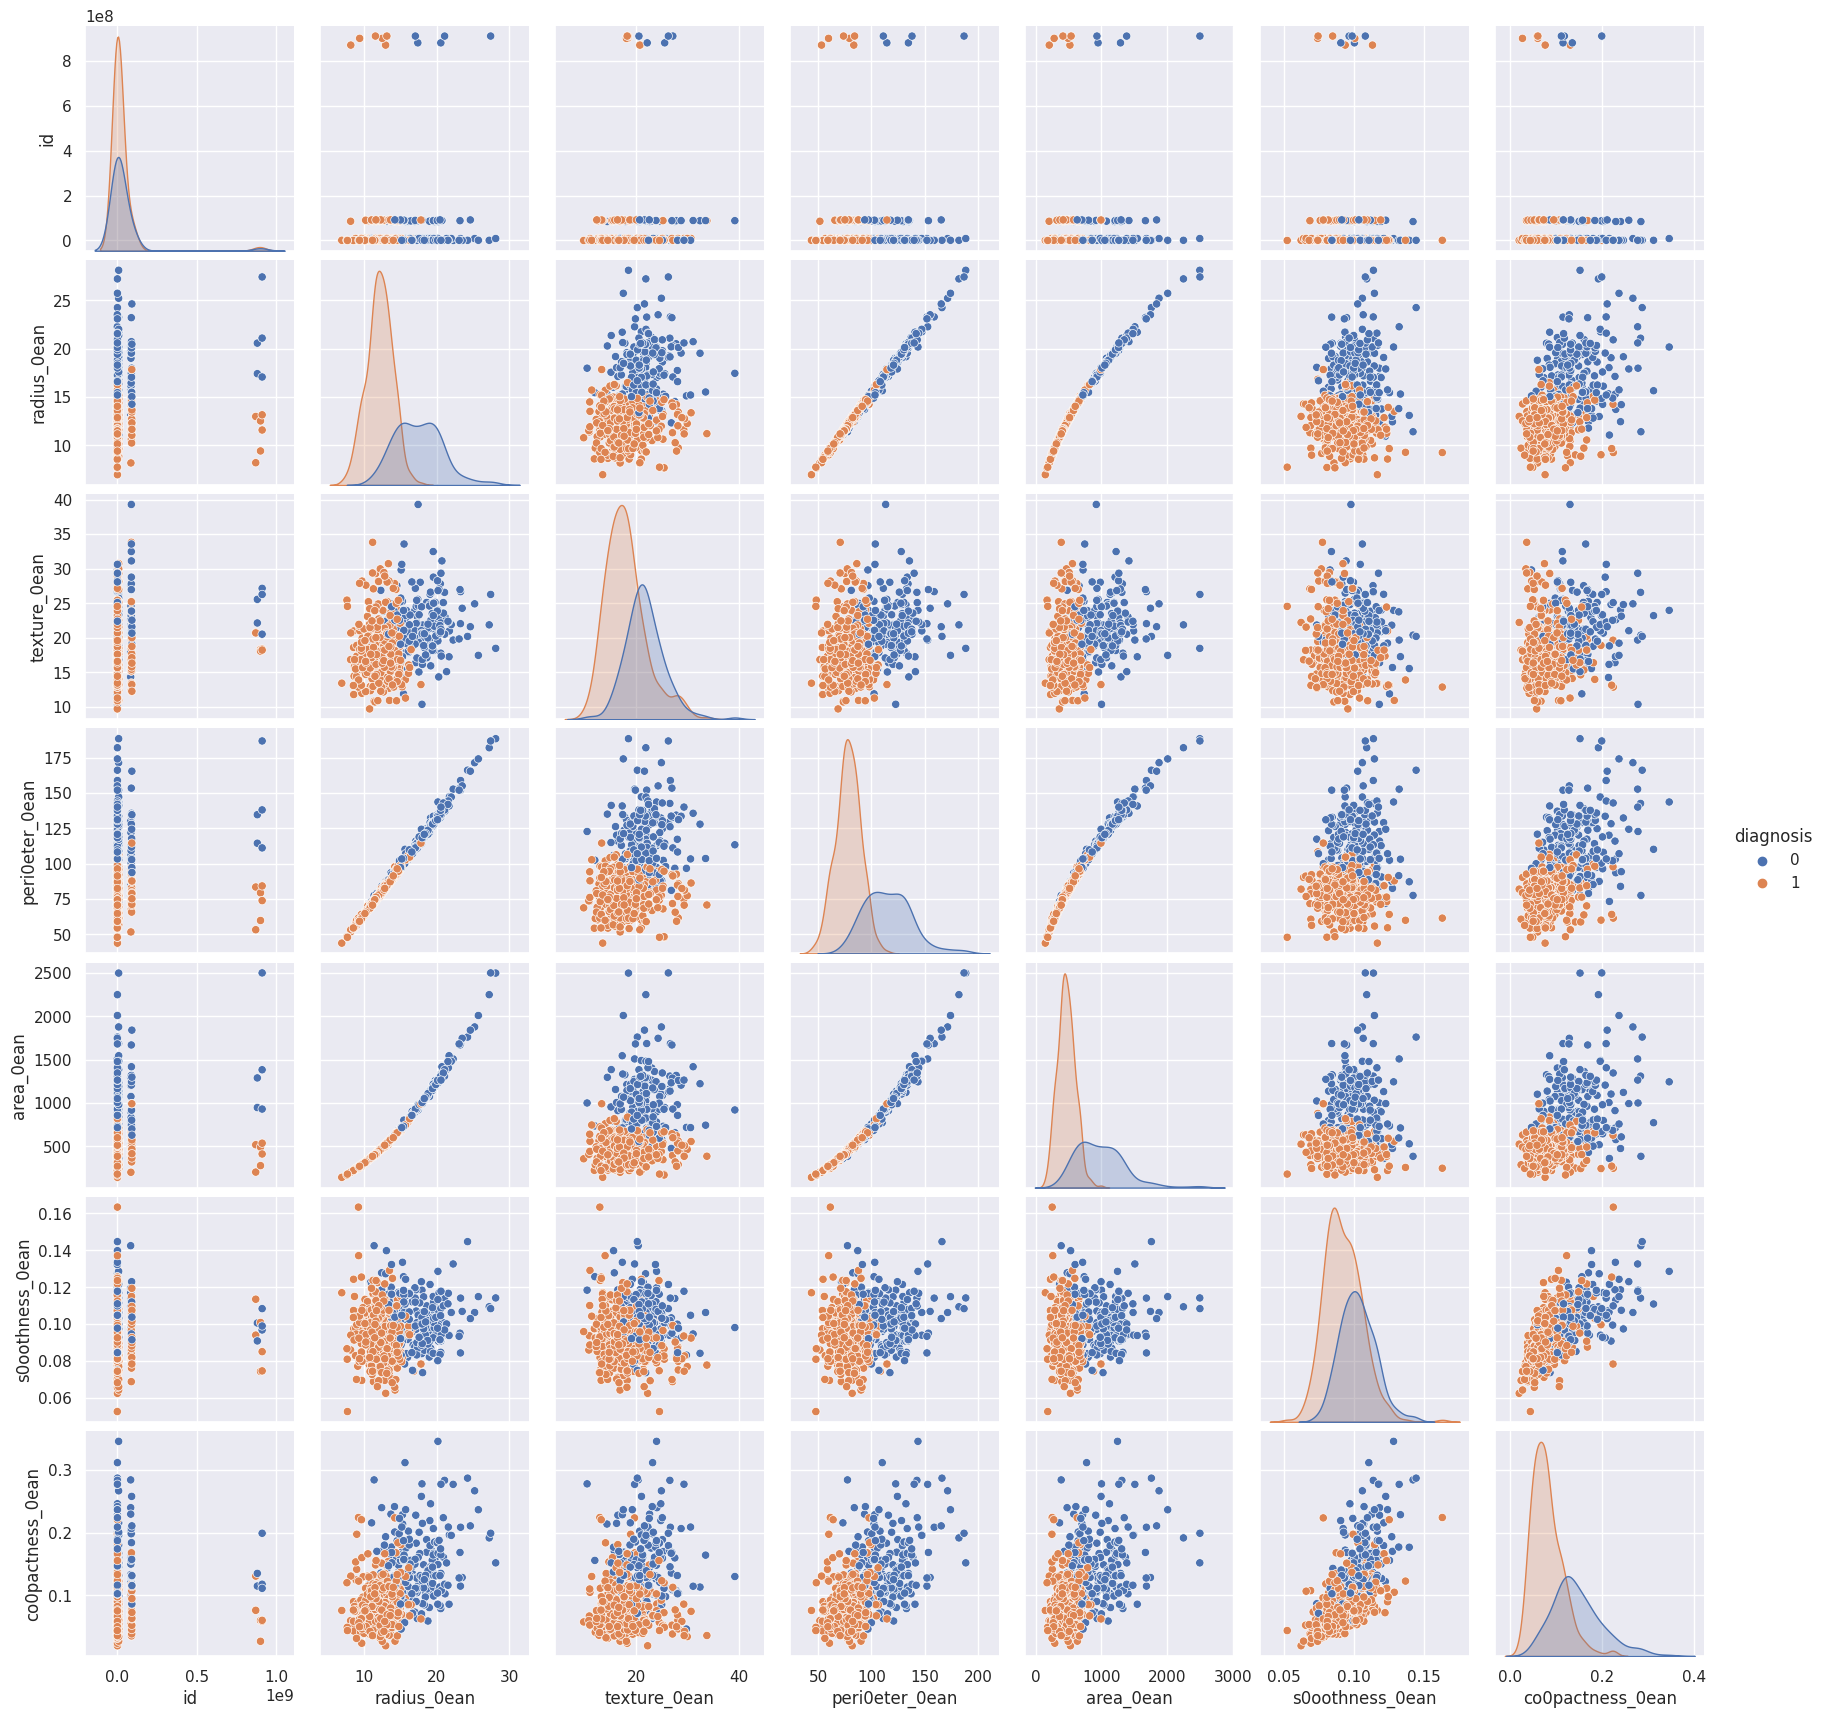

In [85]:
sns.pairplot(df, hue='diagnosis')
plt.show()

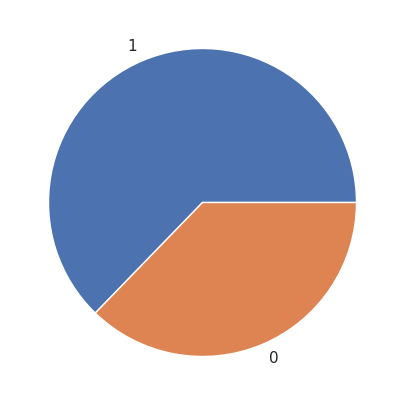

In [86]:
y =df['diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [87]:
X = df.drop(columns=['diagnosis'])
X.head(10)

,id,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960


In [88]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.00000,869218.00000,906024.00000,8.813129e+06,9.113205e+08
radius_0ean,569.0,1.412729e+01,3.524049e+00,6.98100,11.70000,13.37000,1.578000e+01,2.811000e+01
texture_0ean,569.0,1.928965e+01,4.301036e+00,9.71000,16.17000,18.84000,2.180000e+01,3.928000e+01
peri0eter_0ean,569.0,9.196903e+01,2.429898e+01,43.79000,75.17000,86.24000,1.041000e+02,1.885000e+02
area_0ean,569.0,6.548891e+02,3.519141e+02,143.50000,420.30000,551.10000,7.827000e+02,2.501000e+03
s0oothness_0ean,569.0,9.636028e-02,1.406413e-02,0.05263,0.08637,0.09587,1.053000e-01,1.634000e-01
co0pactness_0ean,569.0,1.043410e-01,5.281276e-02,0.01938,0.06492,0.09263,1.304000e-01,3.454000e-01


In [89]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,id,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340
5,-0.236393,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335
6,-0.236389,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295
7,0.433000,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102
8,-0.236384,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010
9,0.433343,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358


In [90]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,1.248757e-17,1.00088,-0.243079,-0.236190,-0.235895,-0.172593,7.052629
radius_0ean,569.0,-1.373633e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
texture_0ean,569.0,6.868164e-17,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
peri0eter_0ean,569.0,-1.248757e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_0ean,569.0,-2.185325e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
s0oothness_0ean,569.0,-8.366672e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
co0pactness_0ean,569.0,1.873136e-16,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425


In [91]:
observations = list(df.index)
variables = list(df.columns)

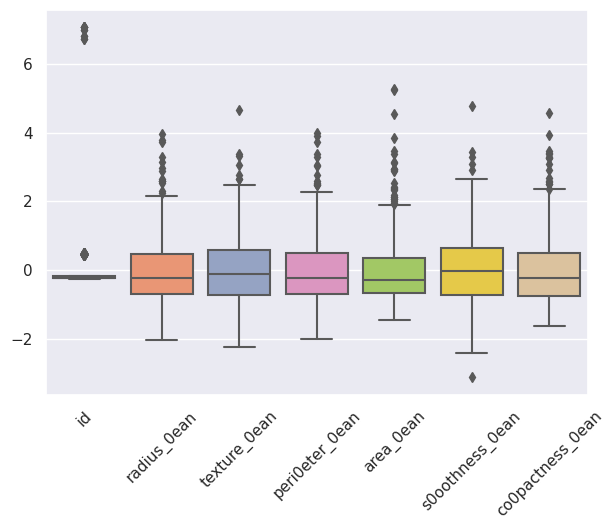

In [92]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


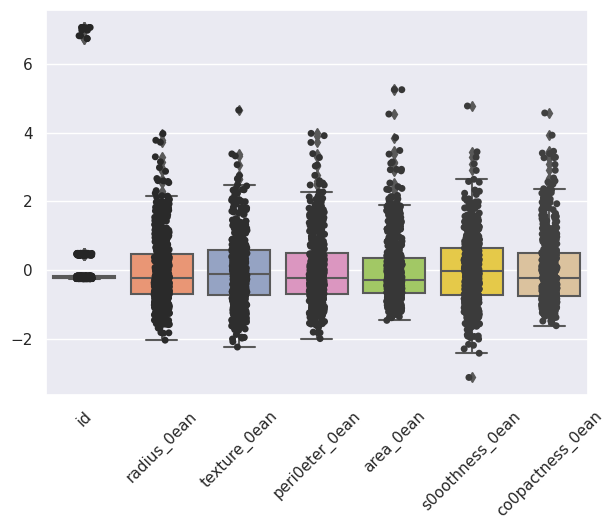

In [93]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

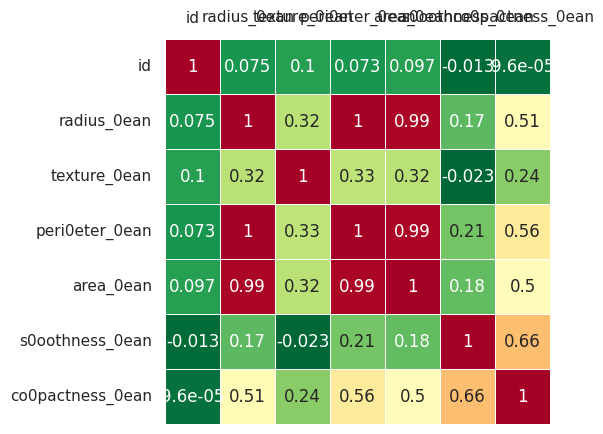

In [94]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

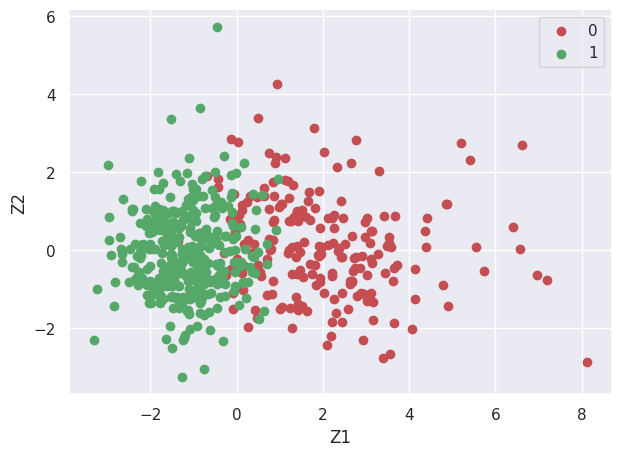

In [95]:
pca = PCA()
Z = pca.fit_transform(X)

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='r', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='1')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

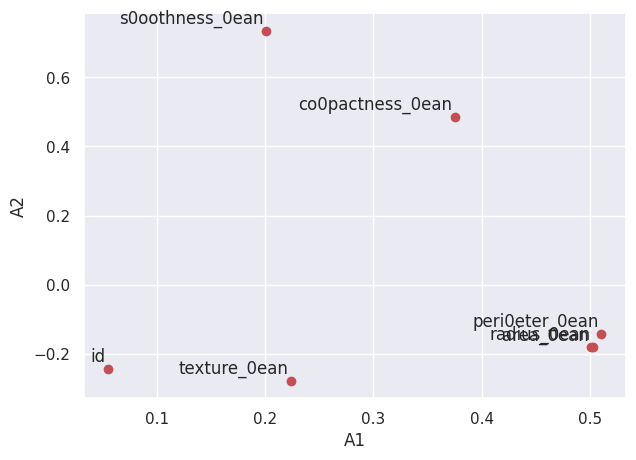

In [96]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
     

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


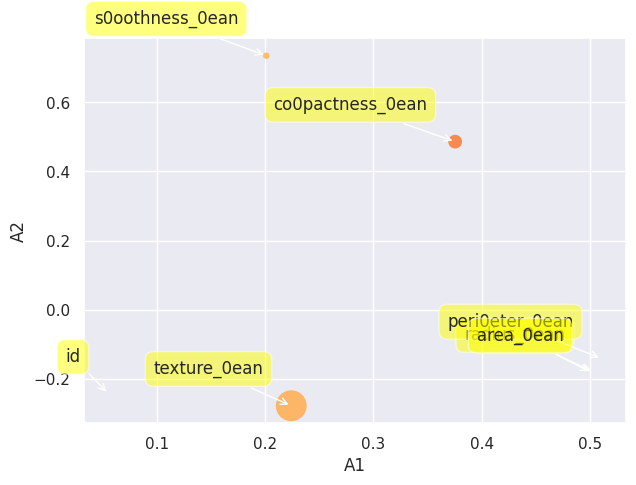

In [97]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

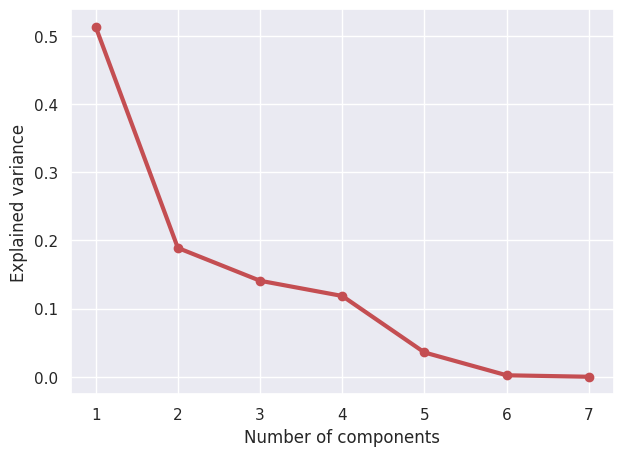

In [98]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 